# Logistic Regression

## What is Logistic Regression?

Despite its name, **Logistic Regression** is used for **classification**, not regression.

### ✅ Use Cases
- Pass / Fail  
- Spam / Not Spam  
- Disease / No Disease  
- Binary outcomes (0 / 1)

---

## Why Not Linear Regression for Classification?

Linear Regression can produce outputs such as:
- -3  
- 1.7  
- 10  

❌ These values do **not** represent valid probabilities.

### Therefore, we need:
- Output values between **0 and 1**
- A function that represents **probability**

👉 This leads us to the **Sigmoid Function**.

---

## The Sigmoid Function (Heart of Logistic Regression)

\[
\sigma(z) = \frac{1}{1 + e^{-z}}
\]

Where:
\[
z = wx + b
\]

### What the Sigmoid Function Does
- Converts any real number into a value between **0 and 1**
- Large positive values → output close to **1**
- Large negative values → output close to **0**

🧠 Think of the sigmoid function as a **probability squasher**.

---

## Logistic Regression Equation

\[
\hat{y} = \sigma(wx + b)
\]

### Final Decision Rule
- If \( \hat{y} \geq 0.5 \) → Class **1**
- If \( \hat{y} < 0.5 \) → Class **0**

---

## Cost Function (Very Important)

Logistic Regression **does not use Mean Squared Error (MSE)**.

Instead, it uses **Log Loss** or **Binary Cross-Entropy**:

\[
J = -\frac{1}{n} \sum \left[ y \log(\hat{y}) + (1 - y)\log(1 - \hat{y}) \right]
\]

### Why Log Loss?
- Strongly penalizes confident but incorrect predictions  
- Works effectively with probability outputs  
- The cost function is **convex**, making optimization easier

---


In [4]:
#simple dataset for binary classification
import numpy as np

X = np.array([[1], [2], [3], [4], [5], [6]])
y = np.array([0, 0, 0, 1, 1, 1])

In [7]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X, y)
predictions = model.predict([[4]])
print("Predictions:", predictions)

# Predict probability
print(model.predict_proba([[4]]))


Predictions: [1]
[[0.36343707 0.63656293]]


In [8]:
print("Weight:", model.coef_)
print("Bias:", model.intercept_)


Weight: [[1.12069525]]
Bias: [-3.9223039]


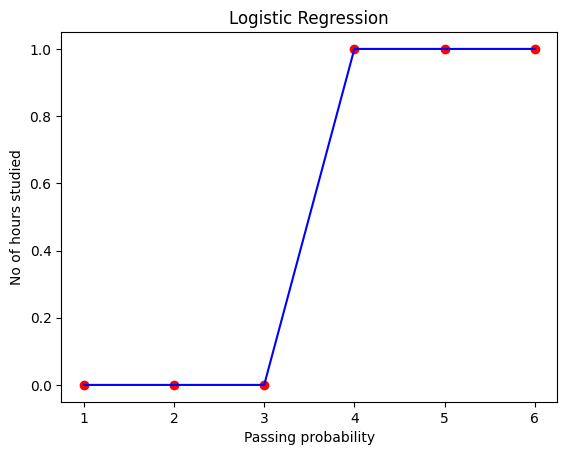

In [10]:
from matplotlib import pyplot as plt
plt.scatter(X, y, color='red')
plt.plot(X, model.predict(X), color='blue') 
plt.xlabel('Passing probability')
plt.ylabel('No of hours studied')
plt.title('Logistic Regression')
plt.show()  


In [3]:
#PRACTICE EXERCISE
#Create a logistic regression model to classify whether a Selected (1) or Not Selected (0) based on the number of hours studied.
#Use the following dataset:
import numpy as np
X = np.array([
    [2, 40],
    [3, 45],
    [4, 50],
    [5, 55],
    [6, 65],
    [7, 70],
    [8, 80],
    [9, 85],
    [10, 90]
])

# 0 = Not Selected, 1 = Selected
y = np.array([
    0,
    0,
    0,
    0,
    1,
    1,
    1,
    1,
    1
])


In [4]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X, y)
predictions = model.predict(X)
print(model.predict([[7,30]]))


[0]


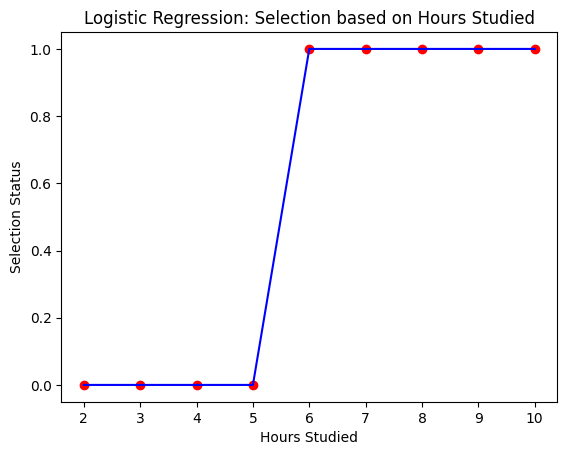

In [5]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], y, color='red')
plt.plot(X[:, 0], model.predict(X), color='blue')   
plt.xlabel('Hours Studied')
plt.ylabel('Selection Status')
plt.title('Logistic Regression: Selection based on Hours Studied')  
plt.show()


In [6]:
# Breast Cancer Prediction
import numpy as np
import pandas as pd

# ML tools
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score


In [7]:
# Load dataset
data = load_breast_cancer()

# Convert to DataFrame
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name="target")

# Check dataset info
print("Shape of X:", X.shape)
print("Target classes:", data.target_names)


Shape of X: (569, 30)
Target classes: ['malignant' 'benign']


In [8]:
# First few rows
X.head()
# Check for missing values
X.isnull().sum().head()



mean radius        0
mean texture       0
mean perimeter     0
mean area          0
mean smoothness    0
dtype: int64

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 455
Testing samples: 114


In [10]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [11]:
model = LogisticRegression(
    max_iter=10000,
    solver="lbfgs"
)

model


LogisticRegression(max_iter=10000)

In [12]:
model.fit(X_train_scaled, y_train)
print("Model training completed ✅")


Model training completed ✅


In [13]:
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]


In [15]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)


Accuracy: 98.24561403508771


In [16]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.98      0.98      0.98        42
           1       0.99      0.99      0.99        72

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [17]:
confusion_matrix(y_test, y_pred)



array([[41,  1],
       [ 1, 71]])

In [18]:
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Weight": model.coef_[0]
}).sort_values(by="Weight", ascending=False)

coefficients.head(10)


,Feature,Weight
5,mean compactness,0.648342
15,compactness error,0.647227
19,fractal dimension error,0.437894
18,symmetry error,0.360492
11,texture error,0.248823
9,mean fractal dimension,0.199732
16,concavity error,0.160563
25,worst compactness,0.055514
14,smoothness error,-0.160276
8,mean symmetry,-0.167233


In [19]:
model.intercept_


array([0.30220757])

In [21]:
# Example new patient (dummy values)
new_patient = np.array([[
    14.2, 20.1, 92.3, 620.0, 0.10,
    0.15, 0.12, 0.09, 0.18, 0.06,
    0.45, 1.1, 3.2, 40.0, 0.006,
    0.03, 0.04, 0.01, 0.02, 0.003,
    16.1, 25.3, 104.5, 810.0, 0.13,
    0.30, 0.25, 0.15, 0.30, 0.09
]])

# Scale
new_patient_scaled = scaler.transform(new_patient)

# Predict
prediction = model.predict(new_patient_scaled)
probability = model.predict_proba(new_patient_scaled)

print("Prediction:", "Benign" if prediction[0] == 1 else "Malignant")
print("Cancer Probability:", probability[0][0]*100)


Prediction: Malignant
Cancer Probability: 69.04815357991448


C:\Users\Ishfaq\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


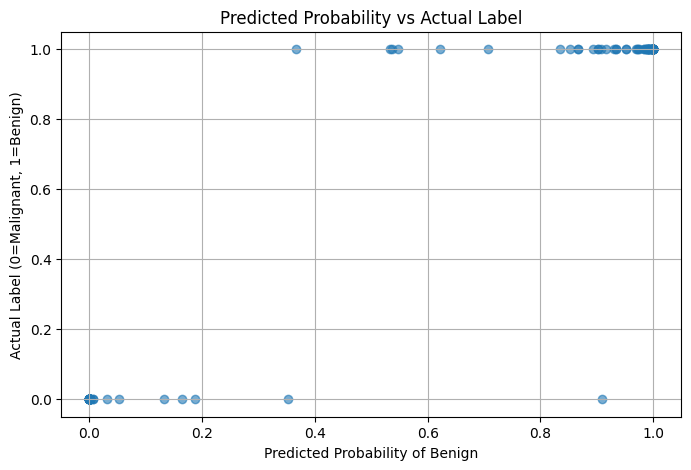

In [25]:
from matplotlib import pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(y_prob, y_test, alpha=0.6)
plt.xlabel("Predicted Probability of Benign")
plt.ylabel("Actual Label (0=Malignant, 1=Benign)")
plt.title("Predicted Probability vs Actual Label")
plt.grid(True)
plt.show()
